In [2]:
!pip install tensorflow==2.2

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.2.0'

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
training_datagenerator = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,validation_split=0.1)

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
train_path = '/content/drive/MyDrive/fire_detect'

In [9]:
train = training_datagenerator.flow_from_directory('/content/drive/MyDrive/fire_detect',target_size=(256,256),color_mode='rgb',class_mode='binary',batch_size=16,subset='training')
validation = training_datagenerator.flow_from_directory('/content/drive/MyDrive/fire_detect',target_size=(256,256),color_mode='rgb',class_mode='binary',batch_size=16,subset='validation')

Found 12394 images belonging to 2 classes.
Found 1376 images belonging to 2 classes.


In [10]:
cnn = tf.keras.models.Sequential() #Intializing CNN
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))  #adding first layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))  #adding second layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))  #adding third layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten()) #Flattening

cnn.add(tf.keras.layers.Dense(units=128,activation='relu')) #fully connected layer

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #output layer

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

In [11]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/model.h5',monitor='val_loss',mode="min",save_best_only=True)     #to save the model after every epoch
callbacks = checkpoint

In [27]:
#training model
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history= cnn.fit_generator(train,validation_data=validation,epochs=1,steps_per_epoch=train.samples//16,validation_steps=validation.samples//16,callbacks=callbacks)

774/774 [==============================] - 497s 642ms/step - loss: 0.0618 - accuracy: 0.9871 - val_loss: 0.0418 - val_accuracy: 0.9891


In [ ]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#acc = history.history['acc']
#val_acc = history.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']

#epochs = range(len(acc))

#plt.plot(epochs, acc, 'g', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
#plt.title('Training and validation accuracy')
#plt.legend(loc=0)
#plt.figure()
#plt.show()

#plt.plot(epochs, loss, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'orange', label='Validation loss')
#plt.title('Training and validation loss')

#plt.legend(loc=0)
#plt.figure()
#plt.show()

In [ ]:
#from tensorflow.keras.models import load_model
cnn = load_model('/content/drive/MyDrive/model.h5')

In [19]:
#cnn.summary()

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

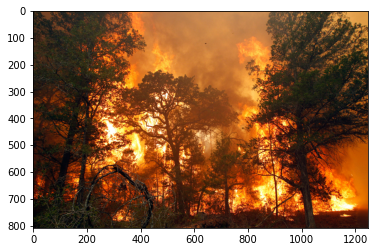

In [32]:
image_for_testing = '/content/drive/MyDrive/fire_detect/fire/COMEX-default.jpg'
image_show = PIL.Image.open(image_for_testing)
plt.imshow(image_show)

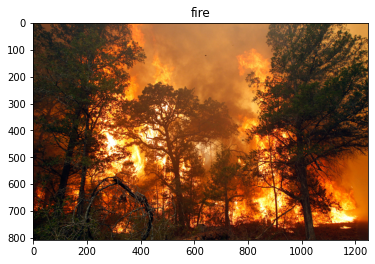

In [33]:
#Testing
test_image = image.load_img(image_for_testing,target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = test_image/255   #rescaling test image pixel values
test_image = np.expand_dims(test_image,axis=0)  #expand for testing(256*256*3/1)
result = cnn.predict_classes(test_image)

categories = ['fire','smoke']

image_show = PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(categories[int(result[0][0])])
plt.show()